# Decision tree

Stop splitting rules:

    - 100% of one class in node
    - exceeding max depth
    - improvements in purity below treshold
    - number of examples below treshold

***

## Splitting rules

### Entropy

Measure of impurity of the node. Takes values between 0 and 1 (the smaller the better).

$$ E = - \sum_{i=1}^{m} p_i*log_2(p_i) = -p_1*log_2(p_1)-(1-p_1)*log_2(1-p_1) $$

pi - probability of selecting class i in the node

Text(0.5, 1.0, 'Entropy')

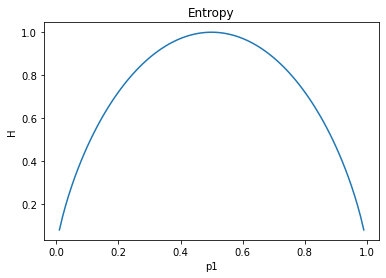

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0.01,0.99,100)
plt.plot(x,-x*np.log2(x)-(1-x)*np.log2(1-x))
plt.xlabel('p1')
plt.ylabel('H')
plt.title('Entropy')

### Gini

Another cryterium for measuring purity of node. Takes values between 0 and 0.5 (the smaller the better).

$$ Gini = 1 - \sum_{i=1}^{m} p_i^{2} = 1-p_1^{2}-(1-p_1)^{2} $$

***

### Information gain

Used to choose the feature to split the data in node. `The higher the better`.

$$ Information Gain = H(p_1)^{root} - (w^{left}*H(p_1)^{left}+w^{right}*H(p_1)^{right}) $$

w stands for wighted average

***

## One-hot encoding

Instead on `one feature taking n values`, create `n features taking 0 or 1 values` (whwther the feature is present for the record)

With this setup we can still use the splitting cryterions like `Gini` or `Entropy`

## Continuous features

For continous values choose a `threshold` that can split the data best (has the best `information gain`).

***

# Regression tree

Tree will group the observations and return `average value` of the `continuous feture` in the `group`.

Splits will be made by reducing the `variance` of the continuous feature in groups.

Information Gain will use `variance instead of entropy` and show largest variance reduction.

$$ Information Gain = Variance^{root} - (w^{left}*Variance^{left}+w^{right}*Variance^{right}) $$

w stands for wighted average

***

In [17]:
import numpy as np

In [40]:
x=np.array([[1,1,1],[0,0,1],[0,1,0],[1,0,1],[1,1,1],[1,1,0],[0,0,0],[1,1,0],[0,1,0],[0,1,0]])
y=np.array([1,1,0,0,1,1,0,1,0,0])

In [41]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)
print(entropy(0.5))

1.0


In [42]:
def split_incides(X,index_feature):
    left_incides=[]
    right_incides=[]
    for i,x in enumerate(X):
        if x[index_feature]==1:
            left_incides.append(i)
        else:
            right_incides.append(i)
    return left_incides, right_incides

In [51]:
def weighted_entropy(X,Y,left_incides,right_incides):
    w_left=len(left_incides)/len(X)
    w_right=len(right_incides)/len(X)
    p_left=sum(Y[left_incides])/len(left_incides)
    p_right=sum(Y[right_incides])/len(right_incides)
    
    weighted_entropy=w_left*entropy(p_left)+w_right*entropy(p_right)
    return weighted_entropy

In [54]:
left_incides,right_incides=split_incides(x,0)
weighted_entropy(x,y,left_incides,right_incides)

0.7219280948873623

In [55]:
def information_gain(X,Y,left_incides,right_incides):
    p_node=sum(Y)/len(Y)
    h_node=entropy(p_node)
    w_entropy=weighted_entropy(X,Y,left_incides,right_incides)
    return h_node-w_entropy

In [57]:
information_gain(x,y,left_incides,right_incides)

0.2780719051126377

In [59]:
for i, feature in enumerate(['ear','face','hair']):
    left_incides,right_incides=split_incides(x,i)
    i_gain=information_gain(x,y,left_incides,right_incides)
    print(f'feature: {feature}, informatio gain: {i_gain:.3f}')

feature: ear, informatio gain: 0.278
feature: face, informatio gain: 0.035
feature: hair, informatio gain: 0.125


***

# Tree ensembles

`single tree` can be very sensitive to chenges in the data

`tree ensemble` - a collection of different trees (trees vote on the final prediciton)

### sampling with replacement

sampling on the same dataset without changing it (so each time each item has the same chance to be chosen)

for each tree we create a subset with the same size (training set) based on the original one (but diffenrent as we randomly choose the items with replacement (each can be chosen more then once))

## Random forest

`random forest` sn one of tree ensembles options

at each node a `feature` to split is `randomly chosen` from a `subset of features`

## XGBoost

similar to random forest but while creating next datasets for new trees we `promote the presence of obserwations that were misclassified`

the changes are being made to te `original dataset`

`XGBRegressor` - for regression 

***

In [29]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost
import matplotlib.pyplot as plt

#### data

In [37]:
df=pd.read_csv('data/heart.csv')

In [38]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
cat_variables=['sex','cp','restecg','exng','slp']

In [47]:
df=pd.get_dummies(data=df,prefix=cat_variables,columns=cat_variables)

In [48]:
df.head()

,age,trtbps,chol,fbs,thalachh,oldpeak,caa,thall,output,sex_0,...,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exng_0,exng_1,slp_0,slp_1,slp_2
0,60,145,233,1,150,2.3,0,1,1,0,...,0,1,1,0,0,1,0,1,0,0
1,35,130,250,0,187,3.5,0,2,1,0,...,1,0,0,1,0,1,0,1,0,0
2,41,130,204,0,172,1.4,0,2,1,1,...,0,0,1,0,0,1,0,0,0,1
3,55,120,236,0,178,0.8,0,2,1,0,...,0,0,0,1,0,1,0,0,0,1
4,56,120,354,0,163,0.6,0,2,1,1,...,0,0,0,1,0,0,1,0,0,1


In [49]:
features=df.columns
features=features.drop('output')

In [50]:
x_train,x_val,y_train,y_val=train_test_split(df[features],df['output'],train_size=0.8,random_state=55)
print(f'x_train: {len(x_train)}')
print(f'x_val: {len(x_val)}')
print(f'proportion: {sum(y_train)/len(y_train):.3f}')

x_train: 231
x_val: 58
proportion: 0.593


#### decision tree

In [53]:
min_samples_split=[2,10,30,50,80,100,150,190,200]
max_depth=[1,2,4,16,32,64]

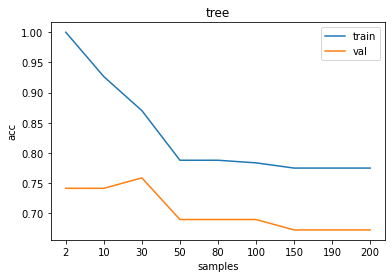

In [54]:
acc_train_list=[]
acc_val_list=[]
for samples in min_samples_split:
    model=DecisionTreeClassifier(min_samples_split=samples,random_state=55).fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('tree')
plt.xlabel('samples')
plt.ylabel('acc')
plt.xticks(ticks=range(len(min_samples_split)),labels=min_samples_split)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

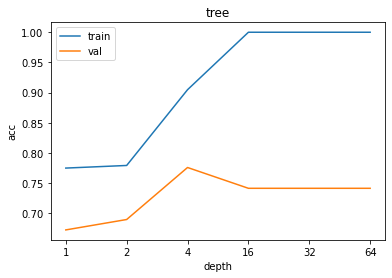

In [55]:
acc_train_list=[]
acc_val_list=[]
for depth in max_depth:
    model=DecisionTreeClassifier(max_depth=depth,random_state=55).fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('tree')
plt.xlabel('depth')
plt.ylabel('acc')
plt.xticks(ticks=range(len(max_depth)),labels=max_depth)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

best performance for `max_depth=4`, `min_samples=30`

In [56]:
decision_tree=DecisionTreeClassifier(min_samples_split=30,max_depth=4,random_state=55).fit(x_train,y_train)

In [60]:
print(f'accuracy_train: {accuracy_score(decision_tree.predict(x_train),y_train):.3f}')
print(f'accuracy_val: {accuracy_score(decision_tree.predict(x_val),y_val):.3f}')

accuracy_train: 0.870
accuracy_val: 0.759
